# Statistical-Methods 实验一：10215501435 杨茜雅

## 背景描述
为了调查吃巧克力对心血管健康的影响，实验由三种类型的巧克力组成：100g的黑巧克力，含有200mg全脂牛奶的100g黑巧克力和200g的牛奶巧克力。12个实验对象：7女5男。在不同的天数里，每个实验对象将吃一种类型的巧克力，一个小时后测量他们血浆的总抗氧能力。 



## 数据描述
实验次序本身具有随机性，无需再随机化。请使用Project_1.csv中的数据集。数据字典如下表所示。

| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Chocolate | 巧克力类型 | 分类变量 | [1, 2, 3] |
| （因变量）Capacity | 血浆浓度 | 连续变量 | R |



## 问题 
注：显著性水平 $\alpha$ 取0.05

1. 两两比较 3 种巧克力对心血管健康的影响是否存在差异。
2. 判断 3 种巧克力对心血管健康的影响是否有差异。
3. 试说明所使用模型的合理性。
4. 估计食用这 3 种巧克力一小时后血浆的总抗氧能力。请分别给出点估计和区间估计。
5. 用Bonferroni方法比较吃了 3 种巧克力后，一个小时的血浆总抗氧能力两两是否存在差异。
6. 用Tukey方法比较吃了 3 种巧克力后，一个小时的血浆总抗氧能力两两是否存在差异。采用以下两种不同的方法来解决这个问题:
- 直接调用python中现有函数
- 用蒙特卡洛随机模拟分布的方式，确定 $t$ 化极差统计量的分位数 $q_{1-\alpha}(a,df)$ ，计算临界值（critical value) c= $q_{1-\alpha}(a,df)\hat{\sigma}/\sqrt{m}$

7. 基于这个例子，请评述一下Bonferroni方法和Tukey方法的异同。


### 载入一些Python的安装包

In [1]:
import os # 修改工作目录

import numpy as np
import pandas as pd
import scipy.stats as stats # 统计函数
import matplotlib.pyplot as plt
from plotnine import * # ggplot 绘图
from plotnine.data import mpg
from jupyterquiz import display_quiz # Quiz
import seaborn as sns

#from ggplot import ggplot

import math

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t
from statsmodels.stats.stattools import durbin_watson

from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
os.chdir("/home/jovyan/Stat_ML_2023/Data")

In [3]:
print('Data 1 is shown as follows: \n', pd.read_csv("Project_1.csv"))

Data 1 is shown as follows: 
     Obs  Chocolate  Capacity
0     1          1     118.8
1     2          1     122.6
2     3          1     115.6
3     4          1     113.6
4     5          1     119.5
5     6          1     115.9
6     7          1     115.8
7     8          1     115.1
8     9          1     116.9
9    10          1     115.4
10   11          1     115.6
11   12          1     107.9
12    1          2     105.4
13    2          2     101.1
14    3          2     102.7
15    4          2      97.1
16    5          2     101.9
17    6          2      98.9
18    7          2     100.0
19    8          2      99.8
20    9          2     102.6
21   10          2     100.9
22   11          2     104.5
23   12          2      93.5
24    1          3     102.1
25    2          3     105.8
26    3          3      99.6
27    4          3     102.7
28    5          3      98.8
29    6          3     100.9
30    7          3     102.8
31    8          3      98.7
32    9      

## 解决方案

# **Q1:两两比较3种巧克力对心血管健康的影响是否存在差异** 

$\color{blue}{\textit Solution:}$
两两进行二样本独立t检验





In [4]:
alpha = 0.05 # significant level
a = 3 # number of levels
m = 12 # number of replicates
n = a*m # sample size

In [5]:
## Load Data
Data = pd.read_csv("Project_1.csv")
print(Data.columns)# Print the column names of Data_1

Index(['Obs', 'Chocolate', 'Capacity'], dtype='object')


In [6]:
Data1 = Data.drop('Obs', axis=1)
print(Data1)

    Chocolate  Capacity
0           1     118.8
1           1     122.6
2           1     115.6
3           1     113.6
4           1     119.5
5           1     115.9
6           1     115.8
7           1     115.1
8           1     116.9
9           1     115.4
10          1     115.6
11          1     107.9
12          2     105.4
13          2     101.1
14          2     102.7
15          2      97.1
16          2     101.9
17          2      98.9
18          2     100.0
19          2      99.8
20          2     102.6
21          2     100.9
22          2     104.5
23          2      93.5
24          3     102.1
25          3     105.8
26          3      99.6
27          3     102.7
28          3      98.8
29          3     100.9
30          3     102.8
31          3      98.7
32          3      94.7
33          3      97.8
34          3      99.7
35          3      98.6


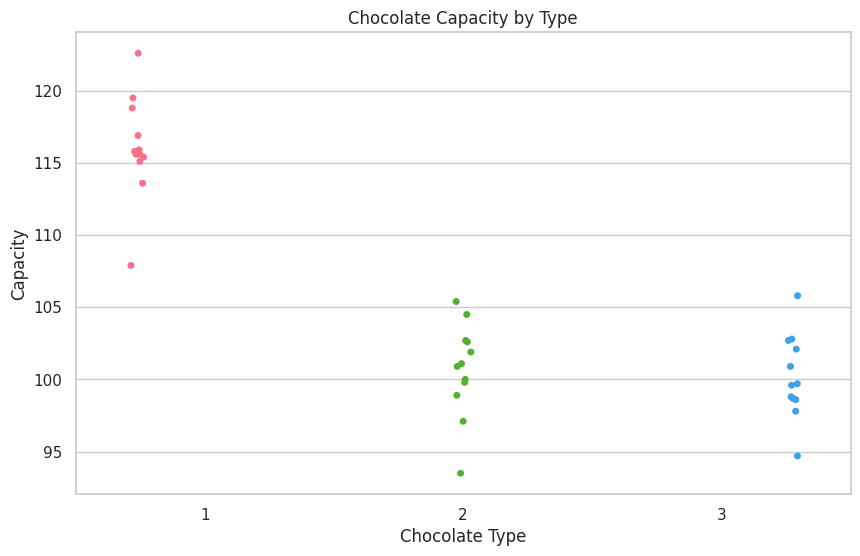

In [7]:
sns.set(style="whitegrid")

# 创建散点图
plt.figure(figsize=(10, 6))
sns.stripplot(x='Chocolate', y='Capacity', data=Data, jitter=True, dodge=True, palette='husl')

# 添加标签和标题
plt.xlabel('Chocolate Type')
plt.ylabel('Capacity')
plt.title('Chocolate Capacity by Type')

# 显示图形
plt.show()

在上图中，可以从直观上比较三种巧克力对血浆浓度的影响。感觉上，三种巧克力是有区别的。

假定巧克力1的数据$x_1,x_2,\cdots,x_m$来自一个正态分布$N(\mu_1,\sigma^2)$，巧克力2的数据$y_1,y_2,\cdots,y_n$来自另一个正态分布$N(\mu_2,\sigma^2)$，并且这两个正态分布是相互独立的。于是，比较两组数据差异的问题，就转化为比较两个总体均值差异的问题。通常，我们会考虑这样的一对假设，即原假设和备择假设分别为
$$
H_0: \mu_1 = \mu_2, \quad \text{vs} \quad H_1: \mu_1\neq \mu_2.
$$
为解决这个问题，我们构建了一个检验统计量为
$$
t_0 = \frac{ (\bar{x} - \bar{y})}{\sqrt{s_w^2 (m^{-1} + n^{-1})}}.
$$
其中，
- $\bar{x} = m^{-1} \sum_{i=1}^m x_i$表示巧克力1的样本均值；
- $\bar{y} = n^{-1} \sum_{i=1}^n y_i$表示巧克力2的样本均值；
- $s_w^2 = \frac{(m-1)\sum{i=1}^{m}(x_i-\bar{x})^2 + (n-1)\sum_{i=1}^n (y_i-\bar{y})^2}{m+n-2}$表示两组样本的合方差。

可以证明，在原假设成立的情况下，$t \sim t(m+n-2)$。于是，我们可以构造拒绝域为$\{|t_0| > t_{1-\alpha/2}(m+n-2)\}$。当样本落入拒绝域时，则拒绝原假设；反之，则无法拒绝原假设。除了构造拒绝域这一方法之外，我们还可以计算其$p$值，即
$$
p = 2\times P(t_{m+n-2} > |t_0|) .
$$
如果$p$值小于显著性水平$\alpha$，则拒绝原假设；反之，则无法拒绝原假设。

注：在这个问题中，$m=n=12$。

# 巧克力1和2

In [8]:
group1 = Data[Data['Chocolate'] == 1]['Capacity']
print(group1)
group2 = Data[Data['Chocolate'] == 2]['Capacity']
print(group2)
group3 = Data[Data['Chocolate'] == 3]['Capacity']
print(group3)
# 执行两样本 t 检验
t_statistic, p_value = stats.ttest_ind(group1, group2)

# 打印 t 统计量和 p 值
print("t statistic is:", t_statistic)
print("p-value is:", p_value)
print("critical value is：", round(t.ppf(1-alpha/2,12*2-2),4))

0     118.8
1     122.6
2     115.6
3     113.6
4     119.5
5     115.9
6     115.8
7     115.1
8     116.9
9     115.4
10    115.6
11    107.9
Name: Capacity, dtype: float64
12    105.4
13    101.1
14    102.7
15     97.1
16    101.9
17     98.9
18    100.0
19     99.8
20    102.6
21    100.9
22    104.5
23     93.5
Name: Capacity, dtype: float64
24    102.1
25    105.8
26     99.6
27    102.7
28     98.8
29    100.9
30    102.8
31     98.7
32     94.7
33     97.8
34     99.7
35     98.6
Name: Capacity, dtype: float64
t statistic is: 11.10565260090929
p-value is: 1.733093968209115e-10
critical value is： 2.0739


我们发现，
 检验统计量的绝对值比临界值大得多，所以，拒绝原假设，也就是说，巧克力1和2对心血管健康的影响有显著差异。

除了上述方法之外，我们仍可以采用p值来得到结论。
由于 $P$ 值比显著性水平 $\alpha$ 小，所以，拒绝原假设。

对巧克力1和3、2和3也进行同样的操作

# 巧克力1和3

In [9]:
group1 = Data[Data['Chocolate'] == 1]['Capacity']
group2 = Data[Data['Chocolate'] == 2]['Capacity']
group3 = Data[Data['Chocolate'] == 3]['Capacity']
# 执行两样本 t 检验
t_statistic, p_value = stats.ttest_ind(group1, group3)

# 打印 t 统计量和 p 值
print("t statistic is:", t_statistic)
print("p-value is:", p_value)
print("critical value is：", round(t.ppf(1-alpha/2,12*2-2),4))

t statistic is: 12.047774079768462
p-value is: 3.683389152570871e-11
critical value is： 2.0739


我们发现， 检验统计量的绝对值比临界值大得多，所以，拒绝原假设，也就是说，巧克力1和3对心血管健康的影响有显著差异。

除了上述方法之外，我们仍可以采用p值来得到结论。
由于 $P$ 值比显著性水平 $\alpha$ 小，所以，拒绝原假设。

# 巧克力2和3

In [10]:
group1 = Data[Data['Chocolate'] == 1]['Capacity']
group2 = Data[Data['Chocolate'] == 2]['Capacity']
group3 = Data[Data['Chocolate'] == 3]['Capacity']
# 执行两样本 t 检验
t_statistic, p_value = stats.ttest_ind(group2, group3)

# 打印 t 统计量和 p 值
print("t statistic is:", t_statistic)
print("p-value is:", p_value)
print("critical value is：", round(t.ppf(1-alpha/2,12*2-2),4))

t statistic is: 0.4126071170622644
p-value is: 0.6838877988482657
critical value is： 2.0739


我们发现， 检验统计量的绝对值比临界值小得多，所以，无法拒绝原假设，也就是说，巧克力2和3对心血管健康的影响无显著差异。

除了上述方法之外，我们仍可以采用p值来得到结论。
由于 $P$ 值比显著性水平 $\alpha$ 大，所以，无法拒绝原假设。

## 所以，综上所述，经过两两比较3种巧克力对心血管健康的影响，我们认为：
- 巧克力1与2对心血管健康的影响有显著差异
- 巧克力1与3对心血管健康的影响有显著差异
- 巧克力2与3对心血管健康的影响无显著差异

# **Q2:判断 3 种巧克力对心血管健康的影响是否有差异。** 

$\color{blue}{\textit Solution:}$
进行单因素方差分析

检验假设:
假设原假设$H_0: \mu_1 = \mu_2 = \mu_3 $与备择假设$ H_1: \mu_1, \mu_2, \mu_3$不全相等





Anova Table

| 来源  | 平方和(SS) | 自由度(f) |        均方(MS)        |     检验统计量(F)     |    P-value    |
| :---: | :--------: | :-------: | :--------------------: | :-------------------: | :-----------: |
| 因子A |   $S_A$    | $f_A=a-1$ | $MS_A=\frac{S_A}{f_A}$ | $F=\frac{MS_A}{MS_E}$ | $p=P(Y\ge F)$ |
| 误差E |   $S_E$    | $f_E=n-a$ | $MS_E=\frac{S_E}{f_E}$ |                       |               |
| 总和T |   $S_T$    | $f_T=n-1$ |                        |                       |               |

计算关系如下

$\begin{array}{ll}
S_{T}=\sum_{i=1}^{a} \sum_{j=1}^{m_{i}}\left(y_{i j}-\bar{y}\right)^{2}=\sum_{i=1}^{r} \sum_{j=1}^{m_{i}} y_{i j}^{2}-\frac{T^{2}}{n}, & f_{T}=n-1 \\
S_{A}=\sum_{i=1}^{a} m_{i}\left(\bar{y}_{i} .-\bar{y}\right)^{2}=\sum_{i=1}^{r} \frac{T_{i}^{2}}{m_{i}}-\frac{T^{2}}{n}, & f_{A}=a-1, \\
S_{E}=\sum_{i=1}^{a} \sum_{j=1}^{m_{i}}\left(y_{i j}-\bar{y}_{i \cdot}\right)^{2}=S_{T}-S_{A}, & f_{E}=n-a
\end{array}$

In [11]:
Alpha = 0.05

a = 3
n = 12
load_data = pd.read_csv("Project_1.csv")

data = load_data.values[:,1:3]

print(type(data))

group1 = data[data[:,0] == 1,1]
group2 = data[data[:,0] == 2,1]
group3 = data[data[:,0] == 3,1]

#One-way ANOVA

df = pd.DataFrame(data, columns = ['Chocolate', 'Capacity'])

model = ols('Capacity ~ C(Chocolate)', df).fit()

anovaResults = round(anova_lm(model), 2)
print('The ANOVA table: \n', anovaResults)  

F0, pVal1 = stats.f_oneway(group1, group2, group3)

# 法1 p值：
print('P-value of one way ANOVA:', pVal1)

if pVal1 < Alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 
    
# 法2 检验统计量：
F = round(f.ppf(0.95,dfn =2,dfd = 33), 2)

if F0 > F:
    print('Since F0 > F(0.05,2,33) = ', F, ', reject H0.') #F分布的参数 a-1, n-a
else:
    print('Accept H0.') 

<class 'numpy.ndarray'>
The ANOVA table: 
                 df   sum_sq  mean_sq      F  PR(>F)
C(Chocolate)   2.0  1952.64   976.32  93.58     0.0
Residual      33.0   344.31    10.43    NaN     NaN
P-value of one way ANOVA: 2.5152590041683006e-14

Since p-value < 0.05, reject H0.
Since F0 > F(0.05,2,33) =  3.28 , reject H0.


In [12]:
model = ols('Capacity~C(Chocolate)', df).fit() #使用C(Chocolate)，将 Chocolate 列视为分类变量
anovaResults = round(anova_lm(model),4)
print("\nThe ANOVA table: \n", anovaResults)


The ANOVA table: 
                 df     sum_sq   mean_sq        F  PR(>F)
C(Chocolate)   2.0  1952.6439  976.3219  93.5756     0.0
Residual      33.0   344.3058   10.4335      NaN     NaN


**综上所述我们可以看到，p值小于0.05，F检验统计量的值大于临界值，说明我们可以拒绝原假设，也就是说认为：**

**至少存在两种巧克力对心血管健康的影响有差异**



# **Q3:试说明所使用模型的合理性，即使用单因素方差分析模型是否合理。** 

$\color{blue}{\textit Solution:}$

想要判断ANOVA模型是否恰当，可以利用残差检测来进行分析。  
处理 $i$ 的观测值 $j$ 的残差定义为：$e_{ij} = y_{ij} - \hat{y}_{ij}$  
其中$\hat{y}_{ij}$是对应于$y_{ij}$的一个估计， 
$\hat{y}_{ij} = \hat{\mu} + \hat{\tau}_i = \overline{y}_{··} + (\overline{y}_{i·} - \overline{y}_{··}) = \overline{y}_{i·}$  





**1. 独立性检验**  

【法1】利用残差的时序图，依照收集数据的时间顺序画出残差图有助于检测残差之间的相关性。

data_res
order
[2.74, 6.54, -0.46, -2.46, 3.44, -0.16, -0.26, -0.96, 0.84, -0.66, -8.16, 4.7, 0.4, 2.0, -3.6, 1.2, -1.8, -0.7, -0.9, 1.9, 0.2, 3.8, -7.2, 1.92, 5.62, -0.58, 2.52, -1.38, 0.72, 2.62, -1.48, -5.48, -2.38, -0.48, -1.58]


Text(0, 0.5, 'Residuals')

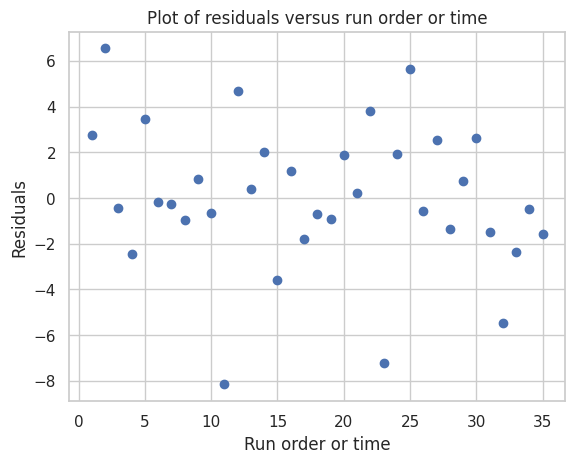

In [13]:
data_res = data.astype(float) * 1
#print(data_res)

list_Chocolate = [1, 2, 3]

for k in list_Chocolate:
    cnt = data_res[data_res[:,0] == k,1]
    data_res[data_res[:,0] == k,1] = cnt - np.mean(cnt)
    
# 画出残差时序图，检测残差之间是否具有独立性
print('data_res')

x = pd.read_csv('Project_1.csv')

random_seq = x.values[:,1]
# print('random_seq')
# print(random_seq)
data_seq = data_res * 1

order = []
for seq in random_seq:
    for Chocolate, Capacity in data_seq:
        if((seq == Chocolate) & (Capacity != 0)):
            order.append(round(Capacity,2))
            data_seq[data_seq[:,1] == Capacity,1] = 0
            break

print('order')
print(order)
# print(len(order))
            
x_order = np.linspace(1,35,35)

plt.scatter(x_order, order)
plt.title('Plot of residuals versus run order or time')
plt.xlabel('Run order or time')
plt.ylabel('Residuals')

【法2】利用Durbin-Watson检验，又称DW检验来做独立性检验。是用来检验分析中残差的一阶自相关性的。  
各残差的相关性方程为：$e_i = \rho * e_{i-1} + v_i$，检验的原假设为：$\rho = 0$，备择假设为：$\rho \neq 0$  
检验统计量为：$$d = \frac{\sum^T_{t=2}\quad(e_i-e_{i-1})^2}{\sum^T_{t=1}\quad e_i^2}$$

In [14]:
def durbin_watson(residuals):
    nume = sum(np.diff(residuals.T) ** 2)
    deno = sum(residuals ** 2)
    return nume / deno
# print(data_res)
res = data_res[:, 1]
print(res)
dw = durbin_watson(res)
print('Durbin-Watson检验的统计量为：', round(dw,2))

[ 2.74166667  6.54166667 -0.45833333 -2.45833333  3.44166667 -0.15833333
 -0.25833333 -0.95833333  0.84166667 -0.65833333 -0.45833333 -8.15833333
  4.7         0.4         2.         -3.6         1.2        -1.8
 -0.7        -0.9         1.9         0.2         3.8        -7.2
  1.91666667  5.61666667 -0.58333333  2.51666667 -1.38333333  0.71666667
  2.61666667 -1.48333333 -5.48333333 -2.38333333 -0.48333333 -1.58333333]
Durbin-Watson检验的统计量为： 2.3


Durbin-Watson检验统计量值为2.3，表示残差之间没有显著的自相关，这被认为是一个好的结果。也就是说，我们接受原假设，认为序列数据是满足独立性的。

**2. 方差齐性检验**  

#### 【法1】Bartlett检验

其核心思想是通过求取不同组之间的卡方统计量，然后根据卡方统计量的值来判断组间方差是否相等。该方法极度依赖于数据是正态分布，如果数据非正态分布，则的出来的结果偏差很大。  

Bartlett检验统计量为：$\chi_0^2 = 2.3026\frac{q}{c}$ 

其中：

$q = (N - a)log_{10}S_p^2 - \sum_{i=1}^a(n_i - 1)log_{10}S_i^2$

$c = 1 + \frac{1}{3(a-1)}(\sum_{i=1}^a(n_i-1)^{-1} - (N - a)^{-1})$  

$S_p^2 = \frac{\sum_{i=1}^a\quad(n_i-1)S_i^2}{N - a}$ 且$S_i^2$是第 $i$ 个总体的样本方差；当$\chi_0^2 > \chi_{\alpha,a-1}^2$ 时，拒绝$H_0$，其中$\chi_{\alpha,a-1}^2$是自由度为$a-1$的卡方分布上的 $\alpha$ 分位数。

Remark:

$$\chi^{2}=\frac{(N-a) \ln \left(S_{p}^{2}\right)-\sum_{i=1}^{k}\left(n_{i}-1\right) \ln \left(S_{i}^{2}\right)}{1+\frac{1}{3(k-1)}\left(\sum_{i=1}^{k}\left(\frac{1}{n_{i}-1}\right)-\frac{1}{N-a}\right)}$$



In [15]:
# 用Bartlett检验进行方差齐性检验
bart, pVal2 = stats.bartlett(group1, group2, group3)
bart_stat = stats.chi2.isf(alpha, a-1)

# 法1:计算Bartlett检验的P值
print('Bartlett检验的P值为：', round(pVal2, 2))
if pVal2 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  

# 法2：计算Bartlett检验统计量
print('Bartlett检验统计量：', round(bart, 2))
print('𝜒_(𝛼,𝑎−1)^2: ', round(bart_stat, 2))
if bart > bart_stat:
    print('Since 𝜒_0^2 > 𝜒_(𝛼,𝑎−1)^2, reject H0.')
else:
    print('Accept H0')  

Bartlett检验的P值为： 0.81
Accept H0
Bartlett检验统计量： 0.42
𝜒_(𝛼,𝑎−1)^2:  5.99
Accept H0


由分析可知，Bartlett检验的P值大于 0.05 且Bartlett检验统计量小于 5.99，故接受原假设，即残差具有方差齐性。  
  

##### 【法2】修正后 Levene 检验

因为 Bartlett 对正态性假定的敏感性，所以对于背离正态性的数据，可以通过修正后的 Levene 检验来解决这个问题。令
$$
y_{ij}^{\ast} = |y_{ij} - \tilde{y}_{i}|, i = 1,2,\cdots,a; j = 1,2,\cdots,n_i.
$$
其中，$\tilde{y}_{i}$表示第$i$组数据的中位数。基于$\{y_{ij}^{\ast}\}$来构建$F$统计量。这个统计量可以用来评价每组数据的绝对偏差的均值是否相等，从而可以判断每组数据的波动是否一致。

Levene检验统计量：

$$W=\frac{1}{M S_{e}} \frac{N\left(\bar{Z}-\bar{Z}_{i}\right)^{2}}{r-1}$$

In [16]:
# 用Levene检验进行方差齐性检验
lene, pVal3 = stats.levene(group1, group2, group3)
print('Levene检验的P值为：', round(pVal3, 2))
if pVal3 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  

Levene检验的P值为： 0.98
Accept H0


由分析可知，Levene检验的P值大于 0.05，故残差具有方差齐性。

**3. 正态性检验**  

【法1】利用qq图（The quantitle-quantile plot），来检验数据分布的相似性。令X轴为正态分布的分位数，Y轴为样本分位数，如果这两者构成的点分布在一条直线上，就证明样本数据与正态分布存在线性相关性，即服从正态分布。

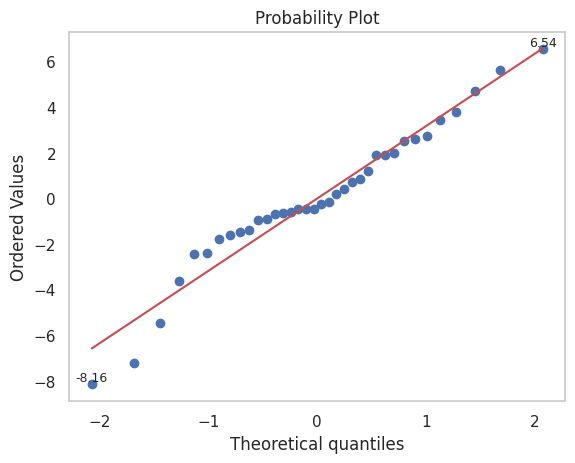

[-8.15833333 -7.2        -5.48333333 -3.6        -2.45833333 -2.38333333
 -1.8        -1.58333333 -1.48333333 -1.38333333 -0.95833333 -0.9
 -0.7        -0.65833333 -0.58333333 -0.48333333 -0.45833333 -0.45833333
 -0.25833333 -0.15833333  0.2         0.4         0.71666667  0.84166667
  1.2         1.9         1.91666667  2.          2.51666667  2.61666667
  2.74166667  3.44166667  3.8         4.7         5.61666667  6.54166667]


In [17]:
# 用qq图进行正态性检验
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x1 = osm[0][0]
y1 = osm[1][0]
plt.text(x1, y1, '%.2f' % float(y1), ha = 'center', va = 'bottom',fontsize = 9)
x2 = osm[0][-1]
y2 = osm[1][-1]
plt.text(x2, y2, '%.2f' % float(y2), ha = 'center', va = 'bottom',fontsize = 9)
plt.grid()
plt.show()

print(osm[1])

由上图可以看出，总体上来看，误差分布是近似正态的；

qq图中间偏右边略微向下弯曲，在中间左边稍有上翘，这意味着误差分布的尾部比起正态分布的尾部要更薄一些，即最大的残差不完全如所期望的那样大。  

**检测异常值的方法：**  

计算标准化残差：$d_{ij} = \frac{e_{ij}}{\sqrt{MS_E}}$。一般地，标准化残差约 68% 落在 ±1 之内，约 95% 落在 ±2 之内，几乎全部落在 ±3 之内。标准化残差的绝对值大于3的残差是一个可能的异常值。  

从上述表中找到最大绝对值得残差，由上述公式得 $d_1 = \frac{e_1}{\sqrt{MS_E}} = -\frac{8.15}{\sqrt{10.43}} = -2.52 \in (-3,3)$，故可说明无明显的异常值，即残差是服从正态分布的。  


【法2】利用Shapiro-Wilk检验来做正态性检验。

其原假设：样本数据符合正态分布。（注：适用于小样本）  
利用方法stats.shapiro()检验正态性，输出结果中第一个为统计量，第二个为P值（统计量越接近 1 越表明数据和正态分布拟合的好，P值大于指定的显著性水平，接受原假设，认为样本来自服从正态分布的总体）

Shapiro-Wilk检验统计量

$$W=\frac{\left(\sum_{i=1}^{n} a_{i} x_{(i)}\right)^{2}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}$$

In [18]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal4 = stats.shapiro(res)
print('Shapiro-Wilk',round(SW, 2))
print('pValue',round(pVal4, 2))

if pVal4 > alpha:
    print('\nAccept the null hypothesis.')
else:
    print('\nSince p-value > 0.05, reject the null hypothesis') 

Shapiro-Wilk 0.96
pValue 0.26

Accept the null hypothesis.


由上述分析可知，统计量为 0.96，接近 1；且P值为 0.26，大于指定的显著性水平 0.05。故认为残差来自服从正态分布的总体。 

# **Q4:估计食用这 3 种巧克力一小时后血浆的总抗氧能力。请分别给出点估计和区间估计。** 

在单因素方差分析模型中，待估参数有
- $\mu$: 总体平均水平；
- $\alpha_i$: 第$i$个水平的效应值；
- $\sigma^2$: 误差方差。

$\mu$的最大似然估计是
$$
\hat{\mu} = \bar{y}_{\cdot\cdot} = \frac{1}{am}\sum_{i=1}^a\sum_{j=1}^m y_{ij};
$$

$\alpha_i$的最大似然估计是
$$
\hat{\alpha}_i = \bar{y}_{i\cdot} - \bar{y}_{\cdot\cdot} = \frac{1}{m}\sum_{j=1}^m y_{ij} - \frac{1}{am}\sum_{i=1}^a\sum_{j=1}^m y_{ij};
$$

$\sigma^2$的常用估计是
$$
\hat{\sigma}^2 = \frac{SS_E}{a(m-1)} = \frac{\sum_{i=1}^a\sum_{j=1}^m (y_{ij} - \bar{y}_{i\cdot})^2}{n-a}= MS_E;
$$

### 点估计

In [19]:
hat_mu = np.mean(Data.Capacity)
print("Overall Mean is:", round(hat_mu,4))

Overall Mean is: 105.6472


In [20]:
# Estimation of Parameter(𝜎2 and 𝜇𝑖 )
mu_1 = np.mean(group1)
mu_2 = np.mean(group2)
mu_3 = np.mean(group3)

mu = [mu_1, mu_2, mu_3]
hat_alpha = [mu_1-hat_mu, mu_2-hat_mu, mu_3-hat_mu]
sse = 0
for i in range(a):
    se = 0
    power_list = data[data[:,0] == (i+1),1]
    for j in range(n):
        se += (power_list[j] - mu[i]) ** 2
    sse += se
var = round(sse / (a * (m - 1)),2) 
print('mean of each level is：{0}'.format(mu))
print('An estimate of sigma^2：{0}'.format(var))
print("The effect of each level is: {0}". format(hat_alpha))

mean of each level is：[116.05833333333334, 100.7, 100.18333333333332]
An estimate of sigma^2：10.43
The effect of each level is: [10.411111111111126, -4.947222222222209, -5.463888888888889]


### 区间估计

因子A 的第 $i$ 个水平的均值 $\mu_i$ 的 $1−\alpha$ 置信区间为
$$
[\bar{y}_{i\cdot}\pm t_{1-\frac{α}{2}} \cdot \frac{\hat{\sigma}}{\sqrt{m}}]
$$

In [21]:
# 置信水平和自由度
alpha = 0.05

# 计算置信区间
margin_of_error = t.ppf(1-alpha/2,n-a) * (np.sqrt(var) / np.sqrt(m))
confidence_interval_1 = (mu_1 - margin_of_error, mu_1 + margin_of_error)
confidence_interval_2 = (mu_2 - margin_of_error, mu_2 + margin_of_error)
confidence_interval_3 = (mu_3 - margin_of_error, mu_3 + margin_of_error)
print("巧克力1的均值的95%置信区间：", confidence_interval_1)
print("巧克力1的均值的95%置信区间：", confidence_interval_2)
print("巧克力1的均值的95%置信区间：", confidence_interval_3)


巧克力1的均值的95%置信区间： (113.94934437825225, 118.16732228841443)
巧克力1的均值的95%置信区间： (98.59101104491891, 102.80898895508109)
巧克力1的均值的95%置信区间： (98.07434437825223, 102.29232228841441)


# **Q5:用Bonferroni方法比较吃了 3 种巧克力后，一个小时的血浆总抗氧能力两两是否存在差异。** 

In [22]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import norm
import math
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import random
import matplotlib.pyplot as plt

import os # 修改工作目录

In [23]:
# 规定参数
alpha = 0.05 # significant level
a = 3 # number of levels
m = 12 # number of replicates
n = a*m # sample size

# 将数据分组
os.chdir("/home/jovyan/Stat_ML_2023/Data")
Data_basic = pd.read_csv("Project_1.csv")
Data = Data_basic.values[:,1:3]
Group1 = Data[Data[:,0] == 1,1]
Group2 = Data[Data[:,0] == 2,1]
Group3 = Data[Data[:,0] == 3,1]
Group1

array([118.8, 122.6, 115.6, 113.6, 119.5, 115.9, 115.8, 115.1, 116.9,
       115.4, 115.6, 107.9])

Bonferroni方法近似考虑每对水平的样本两两之间的独立t检验，但为了避免多重比较问题同时成立的概率不低于$1-\alpha$，将每一个事件发生的概率提高， t 检验的分位数要从原先的 $1-\frac{\alpha}{2}$ 调整为 $1-\frac{\alpha}{a(a-1)}$。

In [24]:
mean_1 = np.mean(Group1)
mean_2 = np.mean(Group2)
mean_3 = np.mean(Group3)
mean = [mean_1, mean_2, mean_3]
sse = 0
for i in range(a):
    s = 0
    lst = Data[Data[:,0] == (i+1),1]
    for j in range(m):
        s += (lst[j] - mean[i]) ** 2
    sse += s
mse = round(sse / (n-a),4)

In [25]:
#比较1和2
flag=np.sqrt(2/m)*np.sqrt(mse)*stats.t.isf(alpha/(a*(a-1)),n-a)
print("食用1、2种巧克力一个小时的血浆总抗氧能力均值差的置信区间为："
,"[",round((mean_1-mean_2)-flag,4),",",round((mean_1-mean_2)+flag,4),"]")


食用1、2种巧克力一个小时的血浆总抗氧能力均值差的置信区间为： [ 12.0323 , 18.6843 ]


In [26]:
#比较1和3
print("食用1、2种巧克力一个小时的血浆总抗氧能力均值差的置信区间为："
,"[",round((mean_1-mean_3)-flag,4),",",round((mean_1-mean_3)+flag,4),"]")


食用1、2种巧克力一个小时的血浆总抗氧能力均值差的置信区间为： [ 12.549 , 19.201 ]


In [27]:
#比较2和3
print("食用1、2种巧克力一个小时的血浆总抗氧能力均值差的置信区间为："
,"[",round((mean_2-mean_3)-flag,4),",",round((mean_2-mean_3)+flag,4),"]")


食用1、2种巧克力一个小时的血浆总抗氧能力均值差的置信区间为： [ -2.8093 , 3.8427 ]


#### 利用Bonferroni方法可知，仅巧克力2与巧克力3的抗氧能力样本均值之差的区间估计值包括0。

#### 其说明巧克力1和2存在一定差异
#### 巧克力1和3存在一定差异
#### 巧克力2与巧克力3无显著差异


# **Q6：用Tukey方法比较吃了 3 种巧克力后，一个小时的血浆总抗氧能力两两是否存在差异。采用以下两种不同的方法来解决这个问题:** 

## 法一：直接调用python中现有函数

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2 -15.3583    0.0 -18.5941 -12.1226   True
     1      3  -15.875    0.0 -19.1108 -12.6392   True
     2      3  -0.5167 0.9191  -3.7524   2.7191  False
------------------------------------------------------


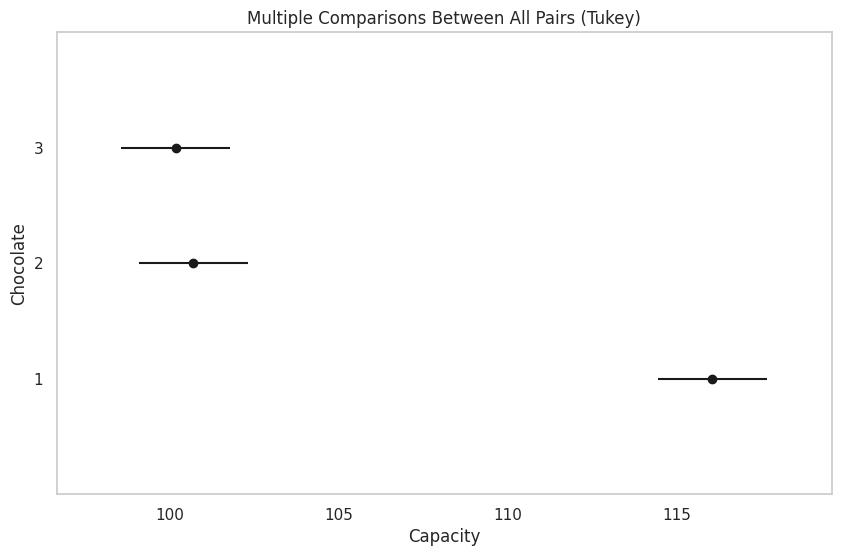

In [28]:
Tukey= pairwise_tukeyhsd(endog = Data_basic["Capacity"], groups=Data_basic["Chocolate"],alpha=alpha)
print(Tukey)
Tukey.plot_simultaneous(ylabel='Chocolate',xlabel='Capacity')
plt.grid()
plt.show()

$P_{12}$<显著性水平0.05，拒绝原假设，两者在血浆抗氧能力方面存在显著差异。

$P_{13}$<显著性水平0.05，拒绝原假设，两者在血浆抗氧能力方面存在显著差异。

$P_{23}$>显著性水平0.05，接受原假设，两者在血浆抗氧能力方面不存在显著差异。

Tukey方法得到的结果与Bonferroni方法得到的结果相同。

## 法二：
用蒙特卡洛随机模拟分布的方式，确定 $t$ 化极差统计量的分位数 $q_{1-\alpha}(a,df)$ ，计算临界值（critical value) c= $q_{1-\alpha}(a,df)\hat{\sigma}/\sqrt{m}$


In [29]:
# 模拟得到q的1-alpha分位数
N = 10000
q = np.zeros(N)
for i in range(N):
    X = np.array([norm.rvs() for x in range(a)])
    y = chi2.rvs(n-a)
    q[i] = (X.max() - X.min()) / np.sqrt(y / (n-a))
q = np.sort(q)
q=q[round((1-alpha)*N)]
print("利用蒙特卡洛方法得到所求分位数的值为 ",q)

var_ = math.sqrt(sse / (a * (m - 1)))
c = q*var_/math.sqrt(m)
print("临界值c的值为 ", c)

利用蒙特卡洛方法得到所求分位数的值为  3.424242221281675
临界值c的值为  3.1929276315043054


In [30]:
mean12 = round(abs(mean_1-mean_2),4)
mean13 = round(abs(mean_1-mean_3),4)
mean23 = round(abs(mean_2-mean_3),4)
print("mean12: ",mean12)
if mean12 < c: 
    print('保留原假设，两者在血浆抗氧能力方面不存在显著差异') 
else:
    print('拒绝原假设，两者在血浆抗氧能力方面存在显著差异') 
print("mean13: ",mean13)
if mean13 < c: 
    print('保留原假设，两者在血浆抗氧能力方面不存在显著差异') 
else:
    print('拒绝原假设，两者在血浆抗氧能力方面存在显著差异') 
print("mean23: ",mean23)
if mean23 < c: 
    print('保留原假设，两者在血浆抗氧能力方面不存在显著差异') 
else:
    print('拒绝原假设，两者在血浆抗氧能力方面存在显著差异')

mean12:  15.3583
拒绝原假设，两者在血浆抗氧能力方面存在显著差异
mean13:  15.875
拒绝原假设，两者在血浆抗氧能力方面存在显著差异
mean23:  0.5167
保留原假设，两者在血浆抗氧能力方面不存在显著差异


### 通过比较均值之差的绝对值与临界值的大小可知：
### 巧克力1和2的抗氧能力均值之差的绝对值均大于临界值，故存在显著差异

### 巧克力1和3的抗氧能力均值之差的绝对值均大于临界值，故存在显著差异

### 巧克力2和3的抗氧能力均值之差的绝对值小于临界值，不存在显著#差异

# **Q7：基于这个例子，请评述一下Bonferroni方法和Tukey方法的异同** 

#### Bonferroni方法和Tukey方法均为用于方差分析时进行多重比较的方法。

Bonferroni法是在LSD法的基础上对α进行了调整。其将一个小的置信区间变换为多个大的置信区间的并集，这是一个比较保守的置信区间，因此估计得到的结果并不准确，精度较差。当比较的次数不多时，该方法效果比较好；当比较次数较多时，该方法对​α的调整会出现矫枉过正的情况。

Tukey检验的一个重要的优点是非常简单,且所需实验样本相对较少。对于一系列比较而言，发生类型 I 错误的几率比单独进行任何一个比较的误差率高。为了避免此高误差率，Tukey 法会调整每个单独区间的置信水平，使生成的整体置信水平等于指定值。Tukey方法对 $P(W)$ 的推导是等价推导，会导致Tukey方法不准的关键因素就在于 $q_{1-\alpha}(a, df)$ 的取值，其可能产生的误差是可控的。

在投入实际应用时，Tukey方法在比较次数较多时精准度上优于Bonferroni方法。且Tukey方法更为简单，所需的实验样本相对较少。
- 如果比较的组数较多（如4组以上），进行两两比较，则首选Tukey法。
- 如果比较组数不是很多（如3组），则Tukey 法和Bonferroni 法均可作为首选。
- 如果不仅想执行两两比较，还想进行其他比较方式，如一个对照组与另外两个试验组的均值比较(A 与B+C/2 比较），则选择Bonferroni法。
- 如果比较次数很多，则不建议选择Bonferroni法。
 ####

